In [1]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn import tree
from os import system
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
#rf ensemble setup
from sklearn.ensemble import VotingClassifier
from scipy.stats import mode
from IPython.display import SVG
#rf ensemble setup

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
import eli5
from graphviz import Source
from sklearn import tree
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  scatter_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#rf
from datetime import datetime

In [3]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [4]:
#targetVariable='V_DISPLAY_SCORE'
#targetVariable='SafeURL'
#targetVariable = 'cred_label'

targetVariable='IS_RANKED'

df = pd.read_csv('university_rank.csv')

print(df.describe(include='all'))
print(df.groupby(targetVariable).describe(include='all'))

df=df.drop('ID',axis=1)
df=df.drop('Rating_Class',axis=1)

# number of rows;
rows=df.shape[0];
print(df.shape[0])

# number of columns;
columns=df.shape[1];
print(df.shape[1])

print("ALPHA:",datetime.now())
missing_data=df.isnull()

                 ID                    NAME              RANKED_IN IS_RANKED  \
count   1803.000000                    1803                   1397      1397   
unique          NaN                    1803                     10       154   
top             NaN  butler-university-1788  National Universities   230-301   
freq            NaN                       1                    301        72   
mean     902.000000                     NaN                    NaN       NaN   
std      520.625585                     NaN                    NaN       NaN   
min        1.000000                     NaN                    NaN       NaN   
25%      451.500000                     NaN                    NaN       NaN   
50%      902.000000                     NaN                    NaN       NaN   
75%     1352.500000                     NaN                    NaN       NaN   
max     1803.000000                     NaN                    NaN       NaN   

       Rating_Class  V_DISPLAY_SCORE  C

In [5]:
from sklearn.preprocessing import LabelEncoder
cv=df.dtypes.loc[df.dtypes=='object'].index
categorical = list(df.select_dtypes(include=['object']).columns.values)
print (cv)
print(categorical)

Index(['NAME', 'RANKED_IN', 'IS_RANKED', 'V_STUDENT_FACULTY_RATIO',
       'R_C_SAT_ACT_PERCENT'],
      dtype='object')
['NAME', 'RANKED_IN', 'IS_RANKED', 'V_STUDENT_FACULTY_RATIO', 'R_C_SAT_ACT_PERCENT']


In [6]:
try:
    # To calculate mean use imputer class

    from sklearn.preprocessing import Imputer

    imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

    imputer = imputer.fit(df[:, 1:columns])
    df[:, 1:3] = imputer.transform(df[:, 1:columns])
except Exception as e:
    print("FillNAs")
    print (str(e))
le=LabelEncoder()

FillNAs
cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)


In [7]:
try:
 for cat in categorical:
        print(cat)
        #df[cat].fillna(targetVariable, inplace=True)
        #df[cat] = le.fit_transform(df[cat])
        df[cat] = le.fit_transform(df[cat].astype(str))
 #for i in cv:
  #  df[i]=le.fit_transform(df[i])
   # test[i]=le.fit_transform(test[i])
except Exception as e:
    print("errorEncoder")
    print (str(e))
print(df.shape)

NAME
RANKED_IN
IS_RANKED
V_STUDENT_FACULTY_RATIO
R_C_SAT_ACT_PERCENT
(1803, 27)


In [8]:
print(df.describe(include='all'))
print(df.groupby(targetVariable).describe(include='all'))

print(df.info())
for grp, data in df.groupby(targetVariable):
 print(grp, data)

#On classification problems you need to know how balanced the class values are.( This is an example)
# positive is the class or target name

print(df.groupby(targetVariable).size() )

# We can analyze all the data set
print(df.describe())
print("BRAVO:",datetime.now())

              NAME    RANKED_IN    IS_RANKED  V_DISPLAY_SCORE  \
count  1803.000000  1803.000000  1803.000000       1056.00000   
mean    901.000000     5.407654    93.760399         56.10322   
std     520.625585     3.768360    50.163089         16.90766   
min       0.000000     0.000000     0.000000         17.00000   
25%     450.500000     1.000000    53.000000         44.00000   
50%     901.000000     6.000000    95.000000         54.00000   
75%    1351.500000     9.000000   150.000000         67.00000   
max    1802.000000    10.000000   154.000000        100.00000   

       C_RNK_TOT_RETENTION  R_C_AVG_PCT_GRAD_6YR  PELL_GRADRATE  \
count          1397.000000           1387.000000    1206.000000   
mean             91.632785             55.306417      53.132670   
std              69.945162             18.360640      18.801094   
min               1.000000              5.000000       0.000000   
25%              34.000000             42.000000      40.000000   
50%         

79     NAME  RANKED_IN  IS_RANKED  V_DISPLAY_SCORE  C_RNK_TOT_RETENTION  \
20   126          7         79             98.0                  1.0   
21   210          5         79             89.0                  3.0   
22   274          8         79             91.0                 10.0   
23   318          2         79             94.0                  1.0   
24   333          1         79             94.0                  3.0   
25   412          6         79             93.0                  9.0   
26   769          9         79             92.0                  6.0   
27   818          1         79             94.0                 21.0   
28  1340          0         79             93.0                  8.0   
29  1647          3         79             83.0                  3.0   
30  1477          1         79             94.0                 26.0   
31  1619          4         79             80.0                 11.0   
32  1722          0         79             93.0              

In [9]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from pandas.api.types import CategoricalDtype
from collections import defaultdict
from sklearn.model_selection import train_test_split

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
X=df
y = pd.DataFrame(data=X, columns=[targetVariable])

print("-------------------------------------------------------------------")
try:
    clean_dataset(df)
except Exception as e:
    print("error_preprocess_clean_dataset")
    print (str(e))
#d = defaultdict(LabelEncoder)

print("-------------------------------------------------------------------")
try:

 #ce_ord=ce.OrdinalEncoder(cols=['RANKED_IN','PolarityClass', 'Category'])
 ce_ord = ce.OrdinalEncoder(cols=['IS_RANKED','RANKED_IN','R_C_SAT_ACT_PERCENT'])
 df = ce_ord.fit_transform(df)
 #df = df.apply(lambda x:ce_ord.fit_transform(X))
 outdata=ce_ord.fit_transform(X,y)
 outdata1=outdata[['RatingClass','PolarityClass', 'Category']]
 outdata2 = outdata[['RatingClass', 'Category']]
 outdata3 = outdata[['RatingClass']]
 # we use all columns except PolarityClass as
 # features for training
 label = df[targetVariable]
 label1 = df[targetVariable]
 features = df.drop(targetVariable, 1)
 # the label is PolarityClass

 print(outdata)
except Exception as e:
    print("error_preprocess0")
    print (str(e))

print("CHARLIE:",datetime.now())

-------------------------------------------------------------------
-------------------------------------------------------------------
error_preprocess0
Lengths must match to compare
CHARLIE: 2023-04-15 19:24:11.241376


In [10]:
print("DELTA:",datetime.now())

DELTA: 2023-04-15 19:24:27.107388


In [11]:
# Evaluation for Missing Data
try:
 missing_data= df.isnull()
 missing_data.head(5)
 print(missing_data.sum())
 for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("================================")

#Finding the porcentage of  missing data
 print(round(((missing_data.sum()/len(missing_data))*100), 4))
#Lets see our outliers in the data set

 q = df.quantile(0.99)
 print(df [df > q])


#Lets check the types
 print(df.dtypes)
except Exception as e:
    print("error_Missing Data")
    print (str(e))

NAME                          0
RANKED_IN                     0
IS_RANKED                     0
V_DISPLAY_SCORE               0
C_RNK_TOT_RETENTION           0
R_C_AVG_PCT_GRAD_6YR          0
PELL_GRADRATE                 0
NONPELL_GRADRATE              0
DIFF_PELL_GRADRATE            0
R_C_AVG_PCT_RETENTION         0
PRED_GRAD_RATE                0
V_DIFF_GRAD_RATES             0
C_AVG_REPUTATION_SCORE_T      0
C_PCT_HS_COUNSELOR            0
FACULTY_RESOURCES_RANK        0
R_C_PCT_TOT_FAC_PT            0
V_FAC_TERMINAL                0
R_C_PCT_CLASSES_1_19          0
R_C_PCT_CLASSES_GT_50         0
V_STUDENT_FACULTY_RATIO       0
C_RNK_TOT_SELECT              0
R_C_SAT_ACT_PERCENT           0
R_C_HS_TOP_10_PCT_CLASS       0
R_C_HS_TOP_25_PCT_CLASS       0
C_RNK_LN_AVG_EDU_EXPENSES     0
C_RNK_ALUM_GIVING_RATE_2YR    0
R_C_ALUM_GIVING_RATE_2YR      0
dtype: int64
NAME
False    364
Name: NAME, dtype: int64
RANKED_IN
False    364
Name: RANKED_IN, dtype: int64
IS_RANKED
False    364
Name

In [12]:
try:
    #y = df[targetVariable]
    #df = df.drop(targetVariable, axis=1)
    #X = df
 X=df.drop(targetVariable,axis=1)
 y=df[targetVariable]

 lab_enc = preprocessing.LabelEncoder()
 training_scores_encoded = lab_enc.fit_transform(y)
 print(utils.multiclass.type_of_target(y))
 print(utils.multiclass.type_of_target(training_scores_encoded.astype('int')))
 print(utils.multiclass.type_of_target(training_scores_encoded))
 print(training_scores_encoded)
#1-Univariete Selection
 
#apply SelectKBest class to extract top 10 best features
 bestfeatures = SelectKBest(score_func=chi2, k='all')
 fit = bestfeatures.fit(X,training_scores_encoded)
 dfscores = pd.DataFrame(fit.scores_)
 dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
 featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 featureScores.columns = ['Specs','Score']  #naming the dataframe columns
 print(featureScores.nlargest(10,'Score'))  #print 10 best features
except Exception as e:
    print("error Feature Selection")
    print (str(e))

multiclass
multiclass
multiclass
[ 0  0  1  1  2  2  2  2  2  2  3  3  3  3  4  5  5  6  7  7  7  8  8  8
  8  8  9  9 10 10 11 11 11 11 12 12 12 12 13 13 14 15 15 15 15 15 16 16
 16 16 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 20 20 20 20 21 21 21
 22 22 22 23 23 24 24 24 25 25 26 26 26 27 27 28 28 28 28 28 28 29 29 29
 29 29 29 30 30 30 30 30 31 31 31 32 32 32 32 32 32 32 32 33 33 33 33 34
 34 34 34 35 35 35 36 36 37 37 37 37 38 39 39 39 39 40 40 40 40 40 40 41
 41 41 41 42 42 42 42 42 42 43 43 44 44 44 44 44 45 45 45 45 46 46 46 47
 47 47 48 48 48 48 48 48 48 48 49 49 49 49 50 50 50 50 50 50 50 51 51 51
 51 51 51 52 52 52 52 53 53 53 53 53 54 54 54 54 54 54 54 54 54 55 55 55
 55 55 56 56 56 57 57 57 58 58 58 59 59 59 59 59 60 60 60 61 61 61 61 61
 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 64 65 65 65 65 65 66 66 66
 67 67 67 67 67 67 67 68 69 69 69 69 69 69 69 69 70 70 70 70 70 71 71 71
 71 71 71 72 72 72 72 72 72 73 73 73 73 73 73 73 73 74 74 74 74 74 74 75
 75 75 75 76 76 76

[0.03494322 0.02013297 0.13262796 0.03800877 0.03737221 0.03546742
 0.03563807 0.0283904  0.03673272 0.03485123 0.02696423 0.04004493
 0.03789891 0.03448335 0.0330615  0.03278194 0.03555777 0.03107707
 0.02908307 0.03888722 0.05584003 0.03513543 0.03273486 0.03506601
 0.03426839 0.03295034]


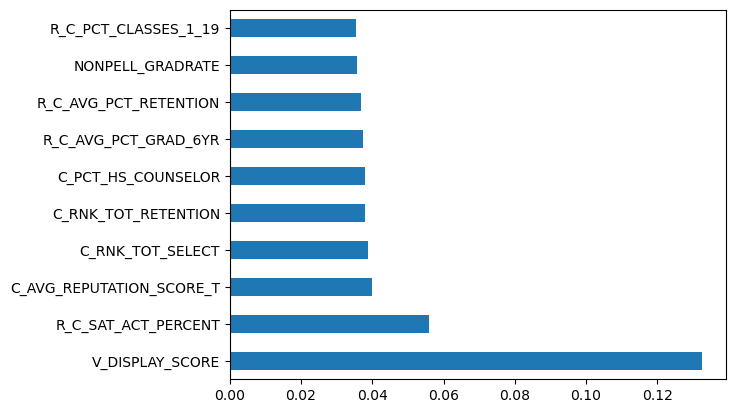

In [13]:
#-Feature Importance

try:
 model = ExtraTreesClassifier()
 model.fit(X,training_scores_encoded)
 print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
 feat_importances = pd.Series(model.feature_importances_, index=X.columns)
 feat_importances.nlargest(10).plot(kind='barh')
 plt.savefig('important_features.png')

except Exception as e:
    print("error Feature Importance")
    print (str(e))

In [23]:
#Load the test,train data.
try:
 print(df.columns)

#rf ensemble setup
 # create training and testing vars
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)
 print (X_train.shape, y_train.shape)
 print (X_test.shape, y_test.shape)

 X=df.drop([targetVariable], axis=1).values
 y=df[targetVariable].values

 scaler = MinMaxScaler(feature_range=(0, 1))
 rescaledX = scaler.fit_transform(X)
 

 
except Exception as e:
    print("training and testing error")
    print (str(e))

Index(['NAME', 'RANKED_IN', 'IS_RANKED', 'V_DISPLAY_SCORE',
       'C_RNK_TOT_RETENTION', 'R_C_AVG_PCT_GRAD_6YR', 'PELL_GRADRATE',
       'NONPELL_GRADRATE', 'DIFF_PELL_GRADRATE', 'R_C_AVG_PCT_RETENTION',
       'PRED_GRAD_RATE', 'V_DIFF_GRAD_RATES', 'C_AVG_REPUTATION_SCORE_T',
       'C_PCT_HS_COUNSELOR', 'FACULTY_RESOURCES_RANK', 'R_C_PCT_TOT_FAC_PT',
       'V_FAC_TERMINAL', 'R_C_PCT_CLASSES_1_19', 'R_C_PCT_CLASSES_GT_50',
       'V_STUDENT_FACULTY_RATIO', 'C_RNK_TOT_SELECT', 'R_C_SAT_ACT_PERCENT',
       'R_C_HS_TOP_10_PCT_CLASS', 'R_C_HS_TOP_25_PCT_CLASS',
       'C_RNK_LN_AVG_EDU_EXPENSES', 'C_RNK_ALUM_GIVING_RATE_2YR',
       'R_C_ALUM_GIVING_RATE_2YR'],
      dtype='object')
(91, 26) (91,)
(273, 26) (273,)


Model Ensemble Voting:Max Vote
C:\Users\Dino\Template_Project
error Visualize1
'numpy.ndarray' object has no attribute 'columns'
      target feature    weight  value
0          0      x2  0.245160  100.0
1          0     x25  0.122414   59.1
2          0     x20  0.061931    1.0
3          0     x24  0.051036    1.0
4          0     x11  0.047579    4.9
...      ...     ...       ...    ...
2041      88      x5 -0.000717   95.0
2042      88     x11 -0.000720    4.9
2043      88      x4 -0.000738   97.0
2044      88      x3 -0.000836    5.0
2045      88      x2 -0.002024  100.0

[2046 rows x 4 columns]
error Ensemble Max Vote evaluation
Filler values must be provided when X has more than 2 training features.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of 

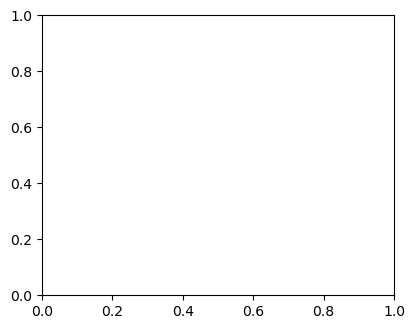

In [30]:
try:
#rf ensemble Max Vote

 print("Model Ensemble Voting:Max Vote")
 print("===============================")
 model1 = DecisionTreeClassifier()
 model2 = KNeighborsClassifier()
 model3= LogisticRegression()

 model1.fit(X_train,y_train)

 try:
  from subprocess import call
  import os, sys
  print(os.getcwd())
  file="tree2_mv.dot"
  dotfile = open(file, 'w')
  tree.export_graphviz(model1, out_file=dotfile, feature_names=X_train.columns)
  dotfile.close()
  file1=os.getcwd()+"\\"+file
  import pydot

  os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
  (graph,) = pydot.graph_from_dot_file(file1)
  graph.write_png('somefile_mv.png')
  call(['dot', '-Tpng', file1, '-o', 'tree_mv.png'])
  display(tree.export_graphviz(model1))
  Source(tree.export_graphviz(model1, out_file=None, feature_names=X_train.columns))
  graph = Source(tree.export_graphviz(model1, out_file=None, feature_names=X_train.columns))
  display(graph)
  SVG(graph.pipe(format='svg'))
  graph = Source(tree.export_graphviz(model1, out_file=None, feature_names=X_train.columns))
  graph.format = 'png'
  graph.render('dtree_render', view=True)
  dotfile = open("dtree1_mv.dot", 'w')
  tree.export_graphviz(model1, out_file=dotfile, feature_names=X_train.columns)
  dotfile.close()
  system("dot -Tpng .dot -o dtree2_mv.png")
  visualize_classifier(model1, X, y)
 except Exception as e:
    print("error Visualize1")
    print (str(e))

 aux1 = eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(model,X[0], top=X.shape[1])
 aux1 = eli5.format_as_dataframe(aux1)
 print(aux1)
 model2.fit(X_train,y_train)
 model3.fit(X_train,y_train)

 pred1=model1.predict(X_test)
 pred2=model2.predict(X_test)
 pred3=model3.predict(X_test)
 from mlxtend.plotting import plot_decision_regions
 import matplotlib.gridspec as gridspec
 import itertools
 score1=model1.score(X_test,y_test)
 score2=model2.score(X_test,y_test)
 score3=model3.score(X_test,y_test)
 gs = gridspec.GridSpec(2, 2)

 fig = plt.figure(figsize=(10, 8))

 labels = ['DecisionTreeClassifier','KNN','Logistic Regression']
 counter=0;
 for clf, lab, grd in zip([model1, model2, model3],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
    name = 'ensemble'+str(counter)
    counter=counter+1
    plt.savefig(name)
 print("lenTestX=",len(X_test)," lenTesty=",len(y_test))
 print("lenTrainX=",len(X_train)," lenTrainy=",len(y_train))
 final_pred = np.array([])
 for i in range(0,len(X_test)):
  final_pred =  mode([pred1[i], pred2[i], pred3[i]])
  #print("Predict ",i,": ",pred1[i],",",pred2[i],",",pred3[i],"vote1=",final_pred[0])
   
 from sklearn.ensemble import VotingClassifier
 #model1 = LogisticRegression(random_state=1)
 model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
 model2 = DecisionTreeClassifier(random_state=1)
 model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
 model.fit(X_train,y_train)
 #print("vote1=",score1)  #since vote1 matches exactly what DecisionTree predicted (score1)
 #print("vote2=",model.score(X_test,y_test))
 #print("Actual : DecisionTree=",score1,",KNN=",score2,", LogisticReg=",score3)
 
except Exception as e:
    print("error Ensemble Max Vote evaluation")
    print (str(e))

In [22]:
#rf ensemble Averaging
print(" ")
print("Model Ensemble Voting:Averaging")
print("===============================")
try:
 model1 = DecisionTreeClassifier()
 model2 = KNeighborsClassifier()
 model3= LogisticRegression()

 model1.fit(X_train,y_train)
 model2.fit(X_train,y_train)
 model3.fit(X_train,y_train)

 pred1=model1.predict_proba(X_test)
 pred2=model2.predict_proba(X_test)
 pred3=model3.predict_proba(X_test)
 
 runningAvgNumerator=0
 for i in range(0,len(X_test)):
  print("probability ",i,": ",pred1[i][0],pred2[i][0],pred3[i][0], ". Probabilty Avg=",(pred1[i][0]+pred2[i][0]+pred3[i][0])/3)
  
 score1=model1.score(X_test,y_test)
 score2=model2.score(X_test,y_test)
 score3=model3.score(X_test,y_test)
 print("Actual : DecisionTree=",score1,",KNN=",score2,", LogisticReg=",score3)
 
  
 
except Exception as e:
    print("error Ensemble Average Vote evaluation")
    print (str(e))

 
Model Ensemble Voting:Averaging
probability  0 :  0.0 0.0 1.2637208671818137e-17 . Probabilty Avg= 4.212402890606045e-18
probability  1 :  0.0 0.0 2.4171627048614245e-32 . Probabilty Avg= 8.057209016204749e-33
probability  2 :  0.0 0.0 6.208360289781094e-35 . Probabilty Avg= 2.0694534299270314e-35
probability  3 :  0.0 0.0 1.4581859577753568e-35 . Probabilty Avg= 4.860619859251189e-36
probability  4 :  0.0 0.0 9.256206305171719e-22 . Probabilty Avg= 3.085402101723906e-22
probability  5 :  0.0 0.0 4.308218689994674e-17 . Probabilty Avg= 1.4360728966648915e-17
probability  6 :  0.0 0.0 4.7531927052245485e-90 . Probabilty Avg= 1.5843975684081828e-90
probability  7 :  0.0 0.0 0.3507890107556824 . Probabilty Avg= 0.11692967025189414
probability  8 :  0.0 0.0 2.478444950888041e-20 . Probabilty Avg= 8.261483169626803e-21
probability  9 :  0.0 0.0 1.8182681799669542e-107 . Probabilty Avg= 6.060893933223181e-108
probability  10 :  0.0 0.0 1.1237591319158255e-52 . Probabilty Avg= 3.74586377305

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi